In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, AutoLocator
from matplotlib import rc
from matplotlib import rcParams

get_ipython().magic(u'matplotlib inline')
import pickle
import matplotlib
import os

from modules.functions import *

%load_ext autoreload
%autoreload 2

/tmp/ipykernel_133127/1730886452.py:6: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


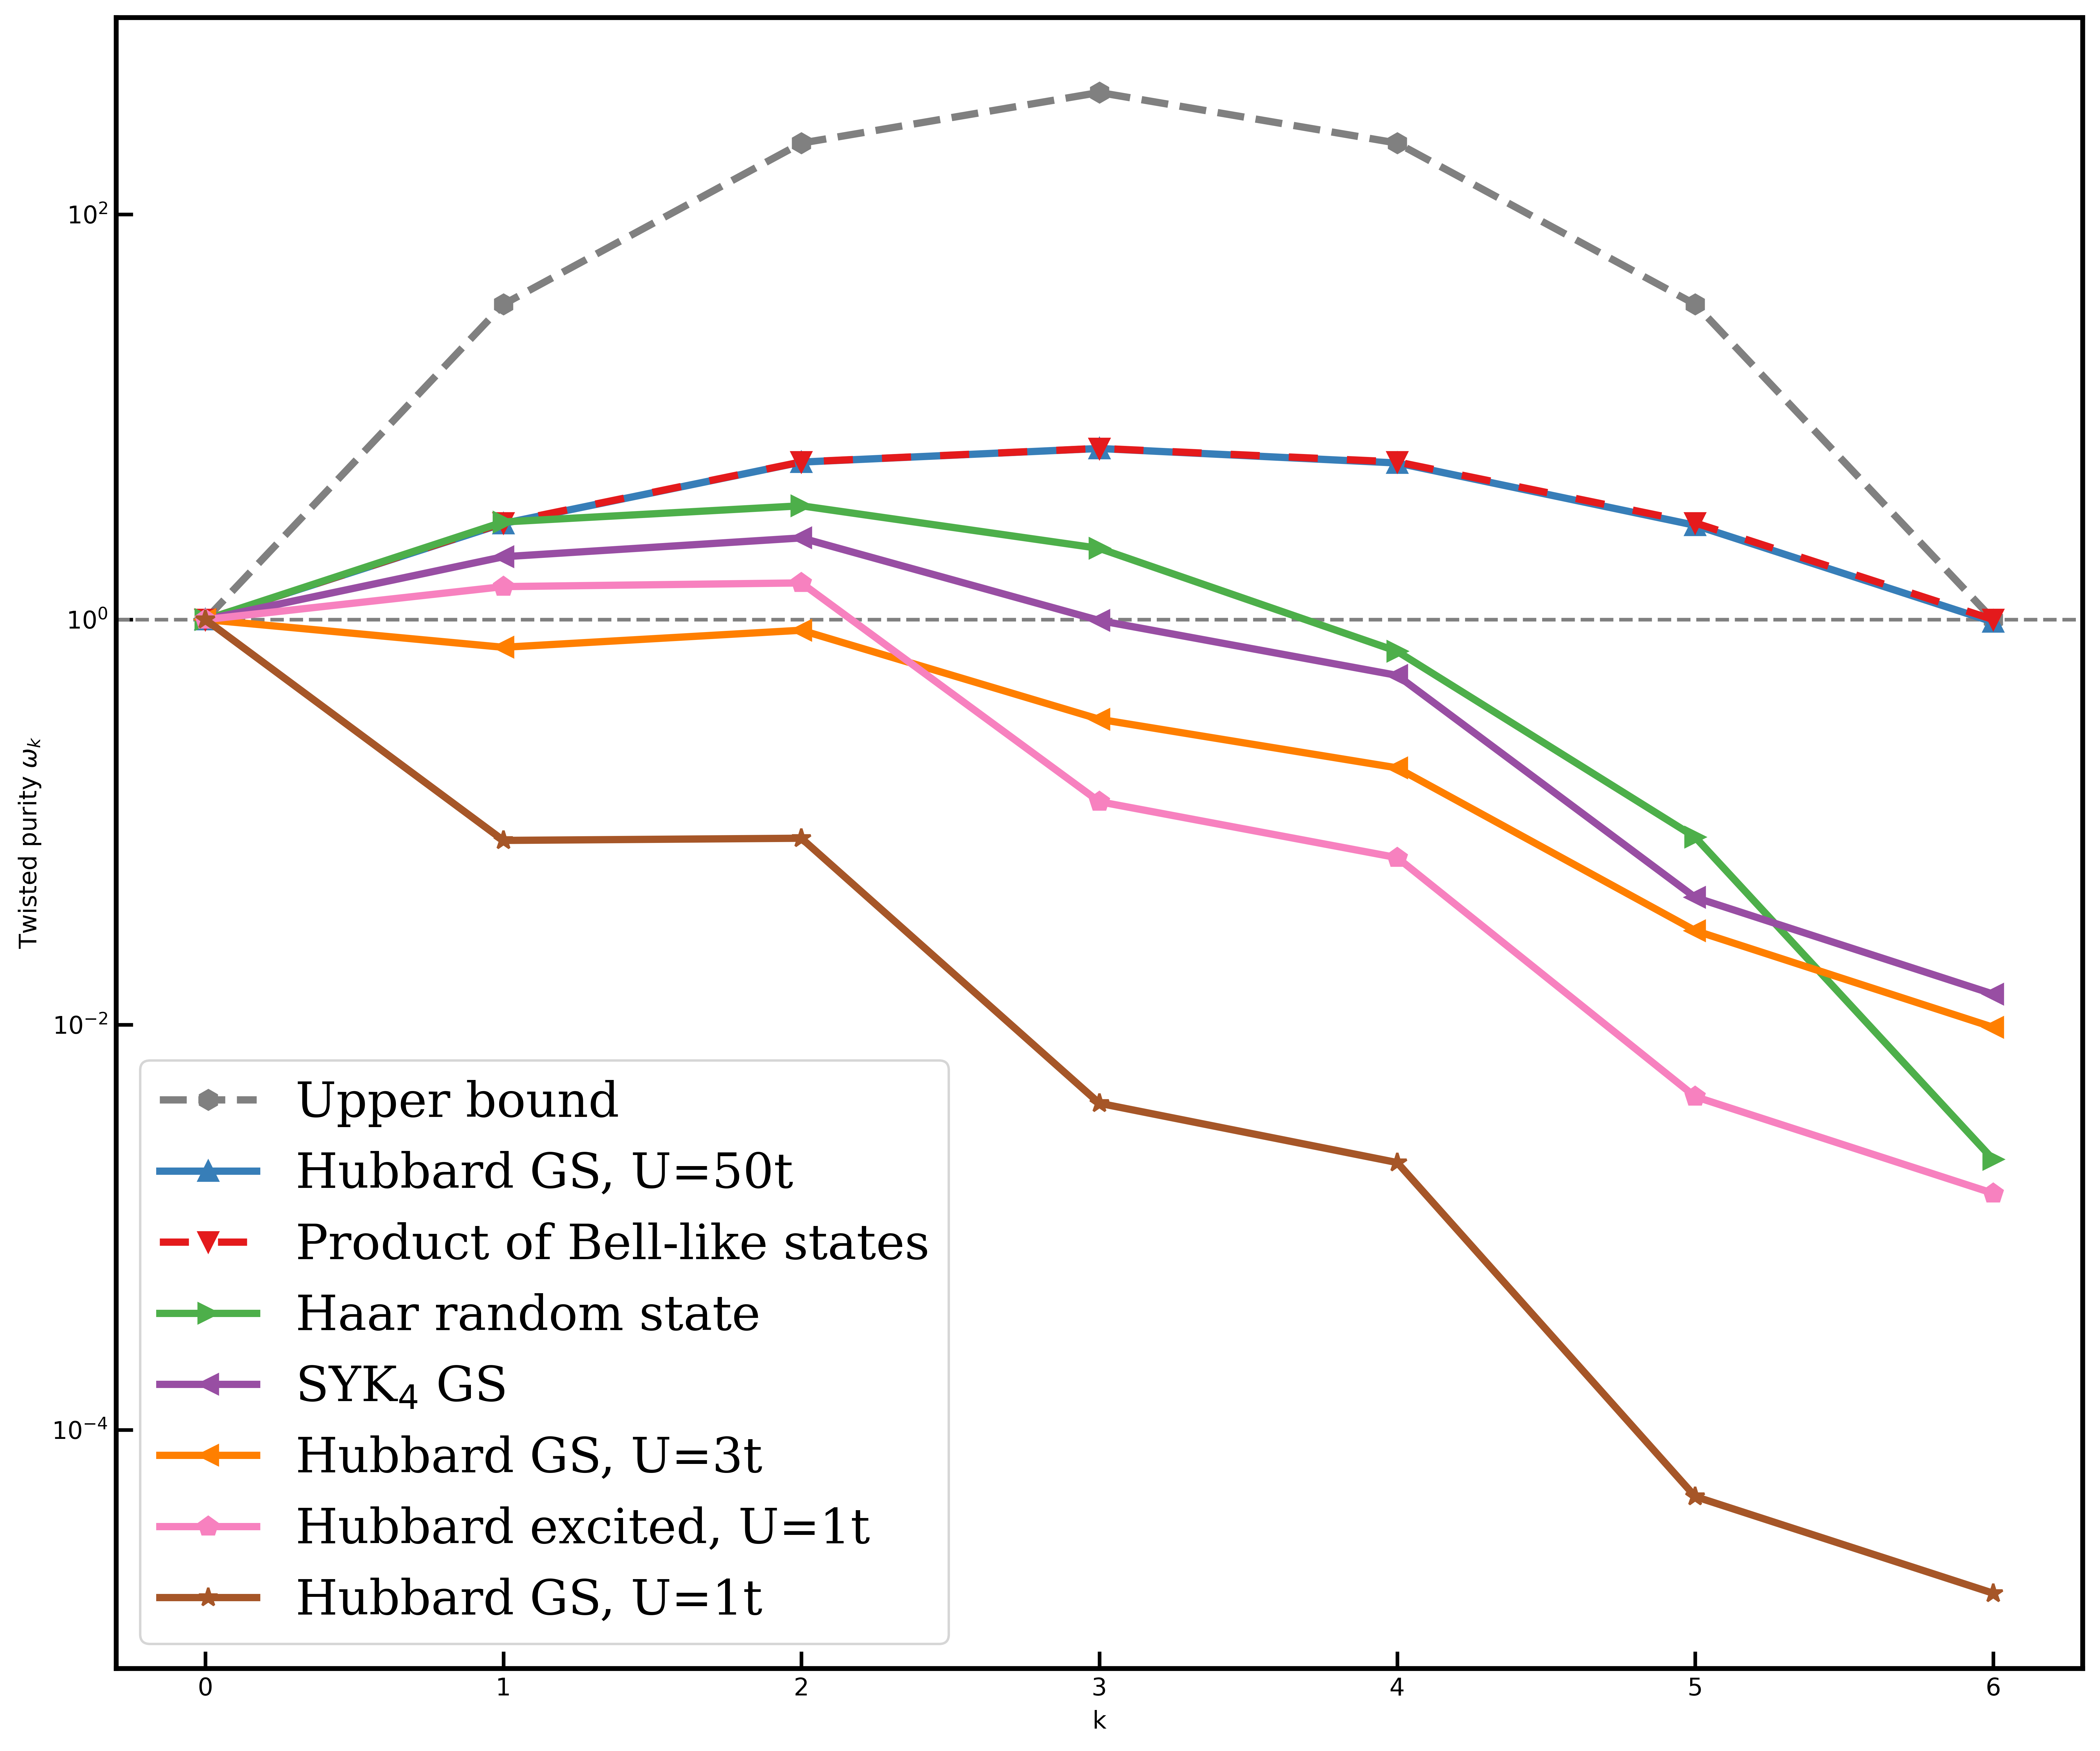

In [2]:
L_SYK = 12
L_Hubbard = 6
L_Haar = 12
U_strong = 50
U_mid = 3
U_weak = 1
U_weak_weak = 0.1
J = 1
Nf = 6

folder_for_figures_Hubbard = 'results_Hubbard/figures_Hubbard/'
folder_for_data_Hubbard = 'results_Hubbard/data_Hubbard/'

#Reading Hubbard - GS, strong coupling
label = "GS"

with open(folder_for_data_Hubbard + 'Pluckers_{}_U={}J_L={}_Nf={}.pkl'.format(label, U_strong, L_Hubbard, Nf), 'rb') as f:
    Pluckers_Hubbard_strong = pickle.load(f)

#Reading Hubbard - GS, mid coupling
label = "GS"

with open(folder_for_data_Hubbard + 'Pluckers_{}_U={}J_L={}_Nf={}.pkl'.format(label, U_mid, L_Hubbard, Nf), 'rb') as f:
    Pluckers_Hubbard_mid = pickle.load(f)

#Reading Hubbard - GS, weak coupling
label = "GS"

with open(folder_for_data_Hubbard + 'Pluckers_{}_U={}J_L={}_Nf={}.pkl'.format(label, U_weak, L_Hubbard, Nf), 'rb') as f:
    Pluckers_Hubbard_weak = pickle.load(f)
    
#Reading Hubbard - GS, weak weak coupling
label = "GS"

with open(folder_for_data_Hubbard + 'Pluckers_{}_U={}J_L={}_Nf={}.pkl'.format(label, U_weak_weak, L_Hubbard, Nf), 'rb') as f:
    Pluckers_Hubbard_weak_weak = pickle.load(f)

#Reading Hubbard - GS, weak coupling, excited
lvl = 21
with open(folder_for_data_Hubbard + 'Pluckers_lowest_k={}_U={}J_L={}_Nf={}.pkl'.format(lvl, U_weak, L_Hubbard, Nf), 'rb') as f:
    Pluckers_Hubbard_excited = pickle.load(f)    
#Pluckers_lowest_k=5_U=0.1J_L=6_Nf=6.pkl

#Reading SYK
folder_for_figures_SYK = 'results_SYK/figures_SYK/'
folder_for_data_SYK = 'results_SYK/data_SYK/'

cwd = os.getcwd()
destdir = cwd + '/' +  folder_for_data_SYK
files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]

if label=="GS":
    Plucker_files = [f for f in files if f[0] == 'P' and f[8]=='G' and int(f[f.find("L=")+2:f.find("_Nf")]) == L_SYK and int(f[f.find("J=")+2:f.find("_L")]) == J and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 
if label=="bulk":
    Plucker_files = [f for f in files if f[0] == 'P' and f[8]=='b' and int(f[f.find("L=")+2:f.find("_Nf")]) == L_SYK and int(f[f.find("J=")+2:f.find("_L")]) == J and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 

Pluckers_SYK = np.zeros(Nf+1)
for file in Plucker_files:
    with open(folder_for_data_SYK + file, 'rb') as f:
        Pluckers_temp = pickle.load(f)
        Pluckers_SYK = Pluckers_SYK + np.array(Pluckers_temp)
Pluckers_SYK = Pluckers_SYK / len(Plucker_files)


#Reading SYK GS
folder_for_figures_SYK = 'results_SYK/figures_SYK/'
folder_for_data_SYK = 'results_SYK/data_SYK/'

label = "GS"

cwd = os.getcwd()
destdir = cwd + '/' +  folder_for_data_SYK
files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]

if label=="GS":
    Plucker_files = [f for f in files if f[0] == 'P' and f[8]=='G' and int(f[f.find("L=")+2:f.find("_Nf")]) == L_SYK and int(f[f.find("J=")+2:f.find("_L")]) == J and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 
if label=="bulk":
    Plucker_files = [f for f in files if f[0] == 'P' and f[8]=='b' and int(f[f.find("L=")+2:f.find("_Nf")]) == L_SYK and int(f[f.find("J=")+2:f.find("_L")]) == J and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 

Pluckers_SYK_GS = np.zeros(Nf+1)
for file in Plucker_files:
    with open(folder_for_data_SYK + file, 'rb') as f:
        Pluckers_temp = pickle.load(f)
        Pluckers_SYK_GS = Pluckers_SYK_GS + np.array(Pluckers_temp)
Pluckers_SYK_GS = Pluckers_SYK_GS / len(Plucker_files)


#Reading Haar

#folder_for_figures_Haar = 'results_Haar/figures_Haar/'
#folder_for_data_Haar = 'results_Haar/data_Haar/'

#cwd = os.getcwd()
#destdir = cwd + '/' +  folder_for_data_Haar
#files = [ f for f in os.listdir(destdir) if os.path.isfile(os.path.join(destdir,f)) ]
#Plucker_files = [f for f in files if f[0] == 'P' and int(f[f.find("L=")+2:f.find("_Nf")]) == L_Haar and int(f[f.find("Nf=")+3:][:f[f.find("Nf=")+3:].find("_")]) == Nf] 

#Pluckers_Haar = np.zeros(Nf+1)
#for file in Plucker_files:
#    with open(folder_for_data_Haar + file, 'rb') as f:
#        Pluckers_temp = pickle.load(f)
#        Pluckers_Haar = Pluckers_Haar + np.array(Pluckers_temp)
#Pluckers_Haar = Pluckers_Haar / len(Plucker_files)

Pluckers_Haar = [0.9989200863930885,
 3.0323974082073435,
 3.6447084233261338,
 2.24622030237581,
 0.6965442764578833,
 0.08423326133909287,
 0.0021598272138228943]

#Reading magic

Pluckers_magic = [1, 3, 6, 7, 6, 3, 1]

#Reading GHZ

Pluckers_GHZ = [1,6,15,20,15,6,1]

#Reading upper bound

Pluckers_bound = [1, 36, 225, 400, 225, 36, 1]

#========

#plt.rcParams["figure.figsize"] = (12,7.5)
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams['ytick.minor.size'] = 0
#plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['ytick.right'] = False

fig, ax = plt.subplots(1,1, dpi=600)
folder_for_figures = 'paper_plots/'

from matplotlib import rc


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 30}

rc('font', **font)

ax.axhline(1, ls='--', color='grey')

ax.set_yscale('log')
plt.yticks([100, 1, 1/100, 1/10000])


ax.tick_params(axis='both', direction='in', width=1.5, size=7)
plt.setp(ax.spines.values(), lw=2)

colors = plt.cm.Set1(np.linspace(0, 1, 9))
#=========

lw = 3
mk = ['o','v','^','>','<','s','p','*','h','H','D','d','1','','']
mks = 8

#ax.plot(range(len(Pluckers_GHZ)), Pluckers_GHZ, label='GHZ state', linewidth=lw, marker=mk[0], markersize=mks);
#ax.plot(range(len(Pluckers_SYK)), Pluckers_SYK, label='SYK$_4$, bulk', linewidth=lw);
ax.plot(range(len(Pluckers_bound)), Pluckers_bound, label='Upper bound', linewidth=lw, marker=mk[8], linestyle='dashed', markersize=mks, color="grey");
ax.plot(range(len(Pluckers_Hubbard_strong)), Pluckers_Hubbard_strong, label='Hubbard GS, U={}t'.format(U_strong), linewidth=lw, marker=mk[2], markersize=mks, color=colors[1]);
line1, = ax.plot(range(len(Pluckers_magic)), Pluckers_magic, label='Product of Bell-like states', linewidth=lw, marker=mk[1], linestyle='dashed', markersize=mks, color=colors[0]);
line1.set_dashes([4, 4])
ax.plot(range(len(Pluckers_Haar)), Pluckers_Haar, label='Haar random state', linewidth=lw, marker=mk[3], markersize=mks, color=colors[2]);
ax.plot(range(len(Pluckers_SYK_GS)), Pluckers_SYK_GS, label='SYK$_4$ GS', linewidth=lw, marker=mk[4], markersize=mks, color=colors[3]);
#ax.plot(range(len(Pluckers_Hubbard_weak_weak)), Pluckers_Hubbard_weak_weak, label='Hubbard GS, U={}t'.format(U_weak_weak), linewidth=lw);
ax.plot(range(len(Pluckers_Hubbard_mid)), Pluckers_Hubbard_mid, label='Hubbard GS, U={}t'.format(U_mid), linewidth=lw, marker=mk[4], markersize=mks, color=colors[4]);
ax.plot(range(len(Pluckers_Hubbard_weak)), Pluckers_Hubbard_excited, label='Hubbard excited, U={}t'.format(U_weak), linewidth=lw, marker=mk[6], markersize=mks, color=colors[7]);
ax.plot(range(len(Pluckers_Hubbard_weak)), Pluckers_Hubbard_weak, label='Hubbard GS, U={}t'.format(U_weak), linewidth=lw, marker=mk[7], markersize=mks, color=colors[6]);

#plt.title("Higher pluckers for states of different systems")
ax.legend(fontsize=20)
ax.set_xlabel("k")
ax.set_ylabel("Twisted purity $\omega_k$")

plt.tight_layout(pad=0.2)
#plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig(folder_for_figures + 'plot_plucker.pdf')
plt.show()